# **RPMoney Consultoria**

- Melissa de Oliveira Pecoraro RM: 98698
- Pedro Marque Pais Pavão RM: 550250
- Roberto Menezes dos Santos RM: 552520


O problema: A equipe de análise de crédito da ABX está sobrecarregada, e com inconsistência nas avaliações de novos compradores, a equipe está desorganizada, sem uma definição clara de setores para análises específicas, a empresa não tem uma base de dados boa contanto o feedback de mercado e segmentação de clientes.

Nós da RPMoney consultoria visamos a otimização de receita e a prevenção de prejuízo. Nossa proposta é oferecer uma estratégia para análise de crédito de novos clientes e possiveis compradores, nosso serviço busca filtrar candidatos a compra confiaveis e potenciais fregueses, além de predizer uma fluxo de caixa saudável, desde a compra e acordo com fornecedores até a revenda, podendo assim otimizar a receita da empresa evitando prejuízos.



# Pré-Processamento

In [54]:
import pandas as pd
import seaborn as sns

In [55]:
df = pd.read_csv('solicitacoescredito.csv')

In [56]:
df.head()

,numero_solicitacao,razaoSocial,nomeFantasia,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,...,periodoDemonstrativoEmMeses,custos,anoFundacao,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,dataAprovadoNivelAnalista
0,1,James Richardson-Patel,Alexandra Williams,KEBE17609492220843,0,0.252448,0.0,2015-12-10T00:00:00,0,0.00,...,12.0,0.0,2003.0,Acima de 17 anos,90000.0,False,True,1.0,43200.0,2020-02-03T20:57:33
1,2,Dr. Geoffrey Walsh,Mr. Darren Arnold,JRBK88908250677300,0,0.000000,NaN,2019-06-12T17:28:31,0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,3,Joanna Hudson,Dr. David Rees,GCVQ28531614261293,4,0.624777,0.0,2019-11-27T00:00:00,0,0.00,...,7.0,0.0,2014.0,De 6 a 10 anos,20000.0,False,True,1.0,4320.0,2020-02-04T16:40:49
3,4,Gordon Jones-Hopkins,Sara Reid-Robson,KJND32266018316396,20,0.000000,NaN,2017-02-13T17:20:27,0,0.00,...,12.0,0.0,2013.0,De 6 a 10 anos,30000.0,False,True,0.0,5920.0,2020-02-04T16:37:52
4,5,Nigel Lee,Dr. Stanley Duncan,CGQN15826802440348,20,0.454088,0.0,2010-07-13T00:00:00,20,1486.95,...,9.0,40680051.0,2002.0,Acima de 17 anos,75000.0,False,False,1.0,89000.0,2020-02-04T15:06:28


## Verificando se existem dados nulos

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8973 entries, 0 to 8972
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   numero_solicitacao           8973 non-null   int64  
 1   razaoSocial                  8973 non-null   object 
 2   nomeFantasia                 8973 non-null   object 
 3   cnpjSemTraco                 8973 non-null   object 
 4   maiorAtraso                  8973 non-null   int64  
 5   margemBrutaAcumulada         8973 non-null   float64
 6   percentualProtestos          7475 non-null   float64
 7   primeiraCompra               8867 non-null   object 
 8   prazoMedioRecebimentoVendas  8973 non-null   int64  
 9   titulosEmAberto              8973 non-null   float64
 10  valorSolicitado              8973 non-null   float64
 11  status                       8973 non-null   object 
 12  definicaoRisco               8973 non-null   object 
 13  diferencaPercentua

## É possível analisar que:
 - existem muitos dados faltantes
 - dentre as 38 features desse dataset, existe uma variedade de dados que retornam números e dados que retornam objetos (strings) e muitos dados que são inuteis como NaN ou valor zerados que terão que ser limpos

In [58]:
df.describe()

,numero_solicitacao,maiorAtraso,margemBrutaAcumulada,percentualProtestos,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,diferencaPercentualRisco,percentualRisco,dashboardCorrelacao,...,duplicatasAReceber,estoque,faturamentoBruto,margemBruta,periodoDemonstrativoEmMeses,custos,anoFundacao,capitalSocial,scorePontualidade,limiteEmpresaAnaliseCredito
count,8973.000000,8973.000000,8973.000000,7475.000000,8973.000000,8.973000e+03,8.973000e+03,8973.000000,8973.000000,8973.000000,...,4.733000e+03,4.733000e+03,8.223000e+03,8.223000e+03,8223.000000,8.223000e+03,8228.000000,8.228000e+03,8973.000000,8.228000e+03
mean,4550.042015,24.642594,0.362176,0.019260,23.083027,6.487101e+04,7.492436e+05,0.750321,0.249679,0.047236,...,1.663397e+07,1.523956e+07,5.597420e+07,1.620988e+07,10.377356,2.839061e+07,2006.027467,1.121453e+07,0.798346,2.851017e+06
std,2603.485853,66.180793,0.201455,0.593579,68.177649,2.482852e+05,2.261875e+07,0.146058,0.146058,0.472476,...,2.979029e+08,8.383792e+07,3.344357e+08,1.163482e+08,3.220965,2.072148e+08,19.424120,9.742853e+07,0.379186,2.672324e+07
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+02,0.207547,0.000000,-0.999990,...,-2.278071e+07,-2.632260e+05,0.000000e+00,-6.148721e+08,1.000000,-3.466338e+08,1000.000000,0.000000e+00,0.000000,0.000000e+00
25%,2316.000000,3.000000,0.281395,0.000000,0.000000,0.000000e+00,2.500000e+04,0.642857,0.142857,0.000000,...,3.920500e+04,1.712860e+05,1.191995e+06,0.000000e+00,11.000000,0.000000e+00,2000.000000,5.000000e+04,0.887479,7.360000e+03
50%,4559.000000,6.000000,0.402895,0.000000,0.000000,0.000000e+00,5.000000e+04,0.750000,0.250000,0.000000,...,1.088164e+06,1.063783e+06,3.599483e+06,0.000000e+00,12.000000,0.000000e+00,2009.000000,1.000000e+05,1.000000,4.860000e+04
75%,6802.000000,22.000000,0.507860,0.000000,30.000000,1.725000e+04,1.200000e+05,0.857143,0.357143,0.000000,...,6.576243e+06,5.493839e+06,1.584222e+07,3.357474e+06,12.000000,4.520907e+06,2015.000000,5.000000e+05,1.000000,3.450000e+05
max,9045.000000,1265.000000,1.000000,36.983728,1605.000000,3.938590e+06,1.500000e+09,1.000000,0.792453,0.999990,...,2.009358e+10,1.293428e+09,6.426115e+09,3.366843e+09,12.000000,4.393536e+09,2020.000000,4.100000e+09,1.000000,1.974261e+09


# Escolhas feitas

Após uma analise do desafio, colunas e os dados presentes nelas, decidimos dividir em dois projetos:
1. Um agrupamento de empresas para que podemos oferecer as melhores descontos, encerrar contratos ou apenas deixar na neutralidade
2. Previsão de demanda futura com precisão para otimizar o armazenamento do estoque da ABX tenologia

# Agrupamento

## Remoção das colunas desnecessarias

In [59]:
df_copy = df.copy()

In [60]:
colunas_necessarias=[
    "maiorAtraso",
    "primeiraCompra" ,
    "margemBrutaAcumulada",
    "percentualProtestos",
    "prazoMedioRecebimentoVendas",
    "titulosEmAberto",
    "status",
    "definicaoRisco",
    "passivoCirculante",
    "endividamento",
    "faturamentoBruto",
    "restricoes",
    "scorePontualidade"
]

In [61]:
df_copy = df_copy[colunas_necessarias]

In [62]:
df_copy = df_copy.dropna()
df_copy.head()

,maiorAtraso,primeiraCompra,margemBrutaAcumulada,percentualProtestos,prazoMedioRecebimentoVendas,titulosEmAberto,status,definicaoRisco,passivoCirculante,endividamento,faturamentoBruto,restricoes,scorePontualidade
4,20,2010-07-13T00:00:00,0.454088,0.0,20,1486.95,AprovadoAnalista,De 11 a 30 % - Baixo,12149031.0,3039112.0,40779757.0,False,1.000000
7,4,2007-07-02T00:00:00,0.350175,0.0,102,208980.00,AprovadoAnalista,De 0 a 10 % - Muito Baixo,2538069.0,0.0,11958227.0,False,1.000000
8,43,2006-07-10T00:00:00,0.245818,0.0,27,6432.00,AprovadoAnalista,De 11 a 30 % - Baixo,13843198.0,0.0,72479551.0,False,1.000000
14,4,2019-03-08T00:00:00,0.314575,0.0,0,0.00,AprovadoAnalista,De 11 a 30 % - Baixo,11680162.0,1567918.0,36783195.0,False,1.000000
19,5,2016-01-20T00:00:00,0.394118,0.0,0,0.00,AprovadoAnalista,De 11 a 30 % - Baixo,50773.0,0.0,57950454.0,False,0.999976


In [63]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3929 entries, 4 to 8963
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   maiorAtraso                  3929 non-null   int64  
 1   primeiraCompra               3929 non-null   object 
 2   margemBrutaAcumulada         3929 non-null   float64
 3   percentualProtestos          3929 non-null   float64
 4   prazoMedioRecebimentoVendas  3929 non-null   int64  
 5   titulosEmAberto              3929 non-null   float64
 6   status                       3929 non-null   object 
 7   definicaoRisco               3929 non-null   object 
 8   passivoCirculante            3929 non-null   float64
 9   endividamento                3929 non-null   float64
 10  faturamentoBruto             3929 non-null   float64
 11  restricoes                   3929 non-null   object 
 12  scorePontualidade            3929 non-null   float64
dtypes: float64(7), int64(2)

## Transformando a coluna de primeira compra

In [64]:
import datetime
import math
TODAY = datetime.date.today()
THRESHOLD = 5

def calculate_fidelity(first_buy):
    date, _ = first_buy.split('T')
    year, month, day = date.split('-')
    actual_date = datetime.date(int(year), int(month), int(day))

    years = (TODAY - actual_date).days / 365

    return math.floor(years / THRESHOLD)


In [65]:
df_copy['primeiraCompra'] = df_copy['primeiraCompra'].apply(calculate_fidelity)


In [66]:
df_copy.head()

,maiorAtraso,primeiraCompra,margemBrutaAcumulada,percentualProtestos,prazoMedioRecebimentoVendas,titulosEmAberto,status,definicaoRisco,passivoCirculante,endividamento,faturamentoBruto,restricoes,scorePontualidade
4,20,2,0.454088,0.0,20,1486.95,AprovadoAnalista,De 11 a 30 % - Baixo,12149031.0,3039112.0,40779757.0,False,1.000000
7,4,3,0.350175,0.0,102,208980.00,AprovadoAnalista,De 0 a 10 % - Muito Baixo,2538069.0,0.0,11958227.0,False,1.000000
8,43,3,0.245818,0.0,27,6432.00,AprovadoAnalista,De 11 a 30 % - Baixo,13843198.0,0.0,72479551.0,False,1.000000
14,4,1,0.314575,0.0,0,0.00,AprovadoAnalista,De 11 a 30 % - Baixo,11680162.0,1567918.0,36783195.0,False,1.000000
19,5,1,0.394118,0.0,0,0.00,AprovadoAnalista,De 11 a 30 % - Baixo,50773.0,0.0,57950454.0,False,0.999976


Agora a coluna primeira compra demonstra o tempo de fidelidade do cliente (em anos)

## Codificação de atributos categóricos

A codificação de atributos categóricos refere-se ao processo de converter atributos categóricos em uma forma numérica que pode ser utilizada por algoritmos de aprendizado de máquina.

In [67]:
df_copy.head(20)

,maiorAtraso,primeiraCompra,margemBrutaAcumulada,percentualProtestos,prazoMedioRecebimentoVendas,titulosEmAberto,status,definicaoRisco,passivoCirculante,endividamento,faturamentoBruto,restricoes,scorePontualidade
4,20,2,0.454088,0.0,20,1486.95,AprovadoAnalista,De 11 a 30 % - Baixo,12149031.0,3039112.0,40779757.0,False,1.000000
7,4,3,0.350175,0.0,102,208980.00,AprovadoAnalista,De 0 a 10 % - Muito Baixo,2538069.0,0.0,11958227.0,False,1.000000
8,43,3,0.245818,0.0,27,6432.00,AprovadoAnalista,De 11 a 30 % - Baixo,13843198.0,0.0,72479551.0,False,1.000000
14,4,1,0.314575,0.0,0,0.00,AprovadoAnalista,De 11 a 30 % - Baixo,11680162.0,1567918.0,36783195.0,False,1.000000
19,5,1,0.394118,0.0,0,0.00,AprovadoAnalista,De 11 a 30 % - Baixo,50773.0,0.0,57950454.0,False,0.999976
21,60,2,0.375781,0.0,1,2400.02,AprovadoComite,De 51 a 80 % - Alto,1164378.0,0.0,1976986.0,True,0.691342
22,18,2,0.691500,0.0,0,0.00,AprovadoAnalista,De 31 a 50 % - Médio,139759.0,0.0,9077423.0,False,0.991829
23,35,1,0.310474,0.0,25,46949.30,AprovadoComite,De 31 a 50 % - Médio,463089426.0,141143911.0,282662079.0,True,0.769472
28,4,1,0.441271,0.0,0,0.00,AprovadoAnalista,De 11 a 30 % - Baixo,26941726.0,0.0,23161787.0,False,1.000000
31,9,1,0.593274,0.0,31,5549.21,AprovadoAnalista,De 31 a 50 % - Médio,235201.0,102438.0,1011836.0,False,1.000000


In [68]:
# O Label Encoding é utilizado para converter valores categóricos em números inteiros.
from sklearn.preprocessing import LabelEncoder

In [69]:
le = LabelEncoder()

# primeiro convertendo a coluna 'status' e 'definicaoRisco' que estão em object
df_copy['status'] = le.fit_transform(df_copy['status'])
df_copy['definicaoRisco'] = le.fit_transform(df_copy['definicaoRisco'])

print(df_copy)

      maiorAtraso  primeiraCompra  margemBrutaAcumulada  percentualProtestos  \
4              20               2              0.454088                  0.0   
7               4               3              0.350175                  0.0   
8              43               3              0.245818                  0.0   
14              4               1              0.314575                  0.0   
19              5               1              0.394118                  0.0   
...           ...             ...                   ...                  ...   
8958            4               2              0.536739                  0.0   
8959           18               2              0.374573                  0.0   
8960            0               0              0.462250                  0.0   
8961           64               3              0.426652                  0.0   
8963           18               1              0.490166                  0.0   

      prazoMedioRecebimentoVendas  titu

In [70]:
# depois mudando o tipo da coluna 'restricoes', que estava em boolean, como True e False, para int
df_copy['restricoes'] = df_copy['restricoes'].astype(int)
print(df_copy)

      maiorAtraso  primeiraCompra  margemBrutaAcumulada  percentualProtestos  \
4              20               2              0.454088                  0.0   
7               4               3              0.350175                  0.0   
8              43               3              0.245818                  0.0   
14              4               1              0.314575                  0.0   
19              5               1              0.394118                  0.0   
...           ...             ...                   ...                  ...   
8958            4               2              0.536739                  0.0   
8959           18               2              0.374573                  0.0   
8960            0               0              0.462250                  0.0   
8961           64               3              0.426652                  0.0   
8963           18               1              0.490166                  0.0   

      prazoMedioRecebimentoVendas  titu

In [71]:
df_copy.head(20)

,maiorAtraso,primeiraCompra,margemBrutaAcumulada,percentualProtestos,prazoMedioRecebimentoVendas,titulosEmAberto,status,definicaoRisco,passivoCirculante,endividamento,faturamentoBruto,restricoes,scorePontualidade
4,20,2,0.454088,0.0,20,1486.95,1,1,12149031.0,3039112.0,40779757.0,0,1.000000
7,4,3,0.350175,0.0,102,208980.00,1,0,2538069.0,0.0,11958227.0,0,1.000000
8,43,3,0.245818,0.0,27,6432.00,1,1,13843198.0,0.0,72479551.0,0,1.000000
14,4,1,0.314575,0.0,0,0.00,1,1,11680162.0,1567918.0,36783195.0,0,1.000000
19,5,1,0.394118,0.0,0,0.00,1,1,50773.0,0.0,57950454.0,0,0.999976
21,60,2,0.375781,0.0,1,2400.02,2,3,1164378.0,0.0,1976986.0,1,0.691342
22,18,2,0.691500,0.0,0,0.00,1,2,139759.0,0.0,9077423.0,0,0.991829
23,35,1,0.310474,0.0,25,46949.30,2,2,463089426.0,141143911.0,282662079.0,1,0.769472
28,4,1,0.441271,0.0,0,0.00,1,1,26941726.0,0.0,23161787.0,0,1.000000
31,9,1,0.593274,0.0,31,5549.21,1,2,235201.0,102438.0,1011836.0,0,1.000000


# Análise Exploratória

## Amostragem de dados em gráficos

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

 Para visualizar a frequência de atrasos.

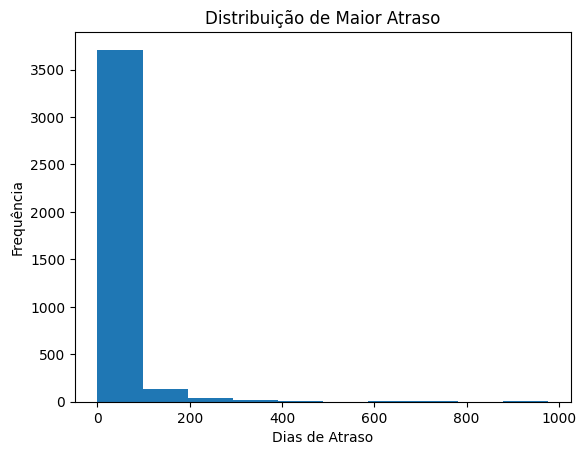

In [73]:
plt.hist(df_copy['maiorAtraso'], bins=10)
plt.title('Distribuição de Maior Atraso')
plt.xlabel('Dias de Atraso')
plt.ylabel('Frequência')
plt.show()

Para ver quantas aprovações existem em cada categoria de status.

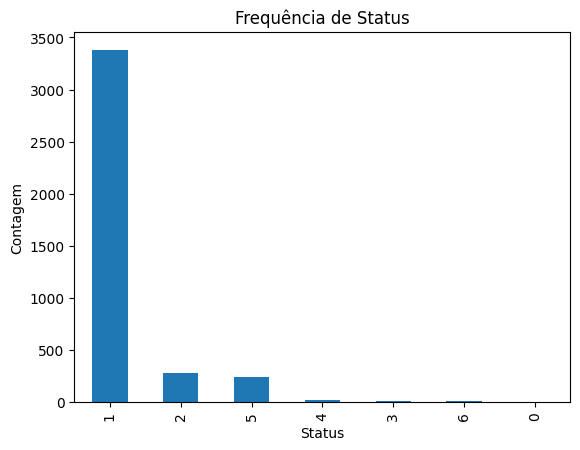

In [74]:
df_copy['status'].value_counts().plot(kind='bar')
plt.title('Frequência de Status')
plt.xlabel('Status')
plt.ylabel('Contagem')
plt.show()

Para visualizar a distribuição de risco

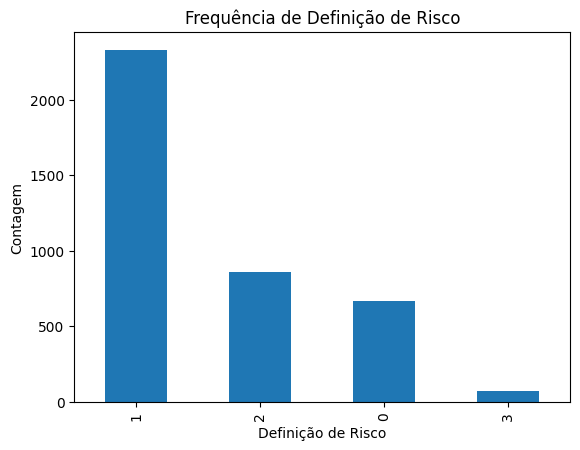

In [75]:
df_copy['definicaoRisco'].value_counts().plot(kind='bar')
plt.title('Frequência de Definição de Risco')
plt.xlabel('Definição de Risco')
plt.ylabel('Contagem')
plt.show()

In [78]:
df_copy.head()


,maiorAtraso,primeiraCompra,margemBrutaAcumulada,percentualProtestos,prazoMedioRecebimentoVendas,titulosEmAberto,status,definicaoRisco,passivoCirculante,endividamento,faturamentoBruto,restricoes,scorePontualidade
4,20,2,0.454088,0.0,20,1486.95,1,1,12149031.0,3039112.0,40779757.0,0,1.000000
7,4,3,0.350175,0.0,102,208980.00,1,0,2538069.0,0.0,11958227.0,0,1.000000
8,43,3,0.245818,0.0,27,6432.00,1,1,13843198.0,0.0,72479551.0,0,1.000000
14,4,1,0.314575,0.0,0,0.00,1,1,11680162.0,1567918.0,36783195.0,0,1.000000
19,5,1,0.394118,0.0,0,0.00,1,1,50773.0,0.0,57950454.0,0,0.999976


In [79]:
df_copy.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3929 entries, 4 to 8963
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   maiorAtraso                  3929 non-null   int64  
 1   primeiraCompra               3929 non-null   int64  
 2   margemBrutaAcumulada         3929 non-null   float64
 3   percentualProtestos          3929 non-null   float64
 4   prazoMedioRecebimentoVendas  3929 non-null   int64  
 5   titulosEmAberto              3929 non-null   float64
 6   status                       3929 non-null   int64  
 7   definicaoRisco               3929 non-null   int64  
 8   passivoCirculante            3929 non-null   float64
 9   endividamento                3929 non-null   float64
 10  faturamentoBruto             3929 non-null   float64
 11  restricoes                   3929 non-null   int64  
 12  scorePontualidade            3929 non-null   float64
dtypes: float64(7), int64(6)

In [81]:
df_copy.shape[1]

13

In [82]:
from sklearn.preprocessing  import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors

In [83]:
df_scaled = StandardScaler().fit_transform(df_copy)

In [84]:
#verificando a distancia entre visinhos com a tecnica do cotovelo
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(df_scaled)
distancias, indices = neighbors_fit.kneighbors(df_scaled)
#pegando o quinto item da lista(coluna) do eixo das linhas
distancias = np.sort(distancias[:, 4], axis=0)

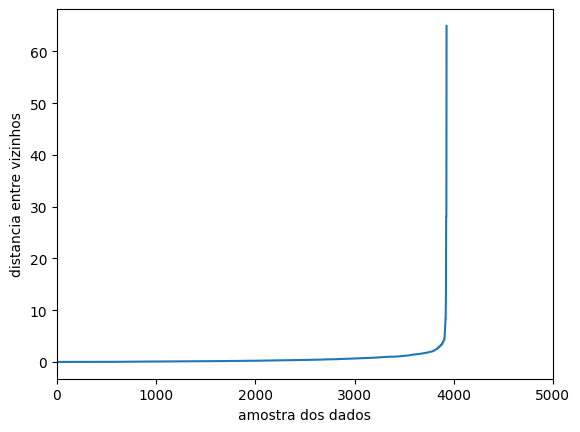

In [85]:
plt.plot(distancias)
plt.ylabel('distancia entre vizinhos')
plt.xlabel('amostra dos dados')
#plt.xlim(0, len(df_fitted))
plt.xlim(0,5000)
plt.show()

> DBSCAN

In [86]:
#tentando com o DBSCAN
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
DBSCAN = DBSCAN(eps=0.9, min_samples=36)
clusters = DBSCAN.fit_predict(df_scaled)
df_copy['Grupo'] = clusters
print(df_copy['Grupo'].value_counts(),"nunique: ", df_copy['Grupo'].nunique())

Grupo
 0    1592
-1    1314
 2     479
 1     465
 3      43
 4      36
Name: count, dtype: int64 nunique:  6


In [87]:
def map_clusters(cluster):# tem que ajustar de acordo com a análise dos clusters
    if cluster == 0 or cluster == -1:
        return 'Oferta'
    elif cluster in [2, 1]:
        return 'Manter contrato'
    else:
        return 'Cortar laços'
df_copy['Grupos'] = df_copy['Grupo'].apply(map_clusters)

In [88]:
print(df_copy['Grupos'].value_counts())

Grupos
Oferta             2906
Manter contrato     944
Cortar laços         79
Name: count, dtype: int64


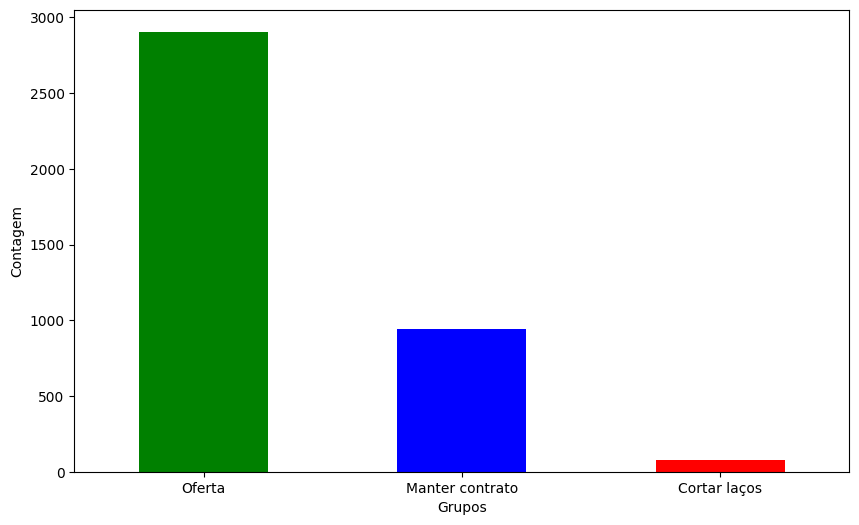

In [89]:
grupos_graf = df_copy['Grupos'].value_counts()

#gráfico de barras
plt.figure(figsize=(10, 6))
grupos_graf.plot(kind='bar', color=['green', 'blue', 'red'])
plt.xlabel('Grupos')
plt.ylabel('Contagem')
#legenda na horizontal
plt.xticks(rotation=0)
plt.show()

> K-Means

In [90]:
#tentando com o kmeans
kmeans = KMeans(n_clusters=13
                , random_state=42)
kmeans.fit(df_scaled)
clusters_kmeans = kmeans.predict(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [91]:
df_copy['Grupo'] = clusters_kmeans
print(df_copy['Grupo'].value_counts(), "nunique: ", df_copy['Grupo'].nunique())

Grupo
2     2417
0      691
5      241
9      197
10     182
11     112
7       33
12      26
6       18
8        6
1        4
4        1
3        1
Name: count, dtype: int64 nunique:  13


In [101]:
def map_clusters(clusters_kmeans):#ajustado de acordo com a análise dos clusters
    if clusters_kmeans == 0 or clusters_kmeans == 2:
        return 'Oferta'
    elif clusters_kmeans in [10, 9, 5]:
        return 'Manter contrato'
    else:
        return 'Cortar laços'
df_copy['Grupos'] = df_copy['Grupo'].apply(map_clusters)

In [102]:
print(df_copy['Grupos'].value_counts())

Grupos
Oferta             3108
Manter contrato     620
Cortar laços        201
Name: count, dtype: int64


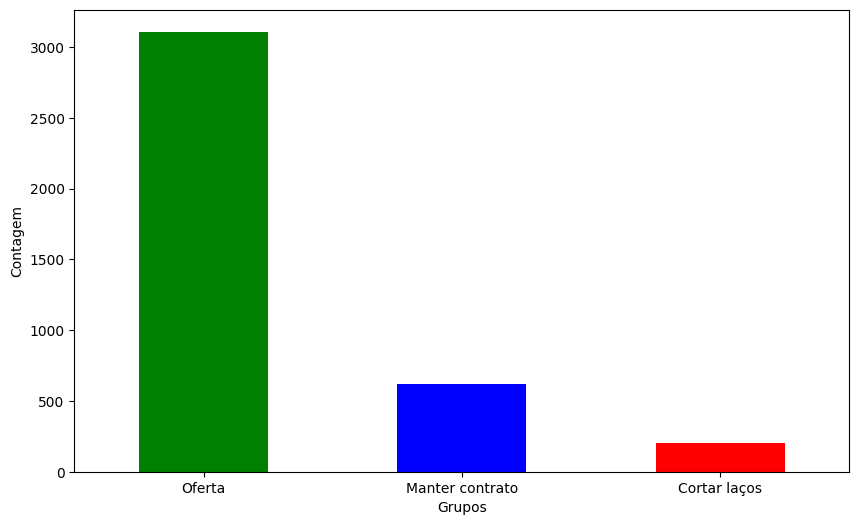

In [103]:
grupos_graf = df_copy['Grupos'].value_counts()

#gráfico de barras
plt.figure(figsize=(10, 6))
grupos_graf.plot(kind='bar', color=['green', 'blue', 'red'])
plt.xlabel('Grupos')
plt.ylabel('Contagem')
#legenda na horizontal
plt.xticks(rotation=0)
plt.show()

Analisando os grupos dos dois algoritimos, podemos concluir que existe um grupo que favorece a ABX Tecnologia, aquele que tem como resultado 'Oferta', havendo uma descrepância entre os grupos e segundo os gráficos da fase de análise exploratória.

###Regressão
Previsão de demanda futura com precisão para otimizar o armazenamento do estoque da ABX tenologia

In [95]:
df_reg = df.copy()

In [96]:
colunas_necessarias=['maiorAtraso', 'margemBrutaAcumulada', 'prazoMedioRecebimentoVendas', 'valorSolicitado', 'status', 'valorAprovado', 'estoque', 'custos']

In [97]:
df_reg = df_reg[colunas_necessarias]

In [98]:
df_copy = df_copy.dropna()
df_copy.head()

,maiorAtraso,primeiraCompra,margemBrutaAcumulada,percentualProtestos,prazoMedioRecebimentoVendas,titulosEmAberto,status,definicaoRisco,passivoCirculante,endividamento,faturamentoBruto,restricoes,scorePontualidade,Grupo,Grupos
4,20,2,0.454088,0.0,20,1486.95,1,1,12149031.0,3039112.0,40779757.0,0,1.000000,2,Oferta
7,4,3,0.350175,0.0,102,208980.00,1,0,2538069.0,0.0,11958227.0,0,1.000000,2,Oferta
8,43,3,0.245818,0.0,27,6432.00,1,1,13843198.0,0.0,72479551.0,0,1.000000,2,Oferta
14,4,1,0.314575,0.0,0,0.00,1,1,11680162.0,1567918.0,36783195.0,0,1.000000,2,Oferta
19,5,1,0.394118,0.0,0,0.00,1,1,50773.0,0.0,57950454.0,0,0.999976,2,Oferta


In [99]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8973 entries, 0 to 8972
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   maiorAtraso                  8973 non-null   int64  
 1   margemBrutaAcumulada         8973 non-null   float64
 2   prazoMedioRecebimentoVendas  8973 non-null   int64  
 3   valorSolicitado              8973 non-null   float64
 4   status                       8973 non-null   object 
 5   valorAprovado                7569 non-null   float64
 6   estoque                      4733 non-null   float64
 7   custos                       8223 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 560.9+ KB


In [100]:
le = LabelEncoder()
df_reg['status'] = le.fit_transform(df_reg['status'])
print(df_reg)

      maiorAtraso  margemBrutaAcumulada  prazoMedioRecebimentoVendas  \
0               0              0.252448                            0   
1               0              0.000000                            0   
2               4              0.624777                            0   
3              20              0.000000                            0   
4              20              0.454088                           20   
...           ...                   ...                          ...   
8968          149              0.306580                           59   
8969           23              0.329796                            0   
8970            3              0.383919                            4   
8971           11              0.424099                           31   
8972            4              0.365041                           56   

      valorSolicitado  status  valorAprovado    estoque      custos  
0             50000.0       1        50000.0        NaN         0